# Lab 12: Exercise solutions

In [1]:
with open('../course/common.py') as fin:
    exec(fin.read())

In [2]:
with open('../course/matplotlibconf.py') as fin:
    exec(fin.read())

## Exercise 1

Compare the representations of Word2Vec, Glove and FastText. In the `data/embeddings` folder we provided you with two additional scripts to download FastText and Word2Vec. Go ahead and download each of them into the `data/embeddings`. Then load each of the 3 embeddings in a separate Gensim model and complete the following steps:

1. define a list of words containing the following words: 'good', 'bad', 'fast', 'tensor', 'teacher', 'student'.
- create a function called `get_top_5(words, model)` that retrieves the top 5 most similar words to the list of words and compare what the 3 different embeddings give you
- apply the same function to each word in the list separately and compare the lists of the 3 embeddings.
- explore the following word analogies:


    man:king=woman:? ==> expected queen
    france:paris=germany:? ==> expected berlin
    teacher:teach=student:? ==> expected learn
    cat:kitten=dog:? ==> expected puppy
    english:friday=italiano:? ==> expected venerdì

Can word analogies be used for translation?

Note that loading the vector may take several minutes depending on your computer. 

In [3]:
import gensim

In [4]:
from gensim.models import KeyedVectors

In [5]:
w2v_path = '../data/embeddings/GoogleNews-vectors-negative300.bin'
w2v_gs = KeyedVectors.load_word2vec_format(
    w2v_path, binary=True)

In [6]:
glove_path = '../data/embeddings/glove.6B.50d.txt.vec'
glove_gs = KeyedVectors.load_word2vec_format(
    glove_path, binary=False)

In [7]:
fasttext_path = '../data/embeddings/wiki-news-300d-1M.vec'
fasttext_gs = KeyedVectors.load_word2vec_format(
    fasttext_path, binary=False)

In [8]:
word_list = ['good', 'bad',
             'fast', 'tensor',
             'teacher', 'student']

In [9]:
def get_top_5(words, gs_model):
    res = gs_model.most_similar(positive=words, topn=5)
    return [r[0] for r in res]

In [10]:
for word in word_list:
    print(word)
    print("W2V     : ", get_top_5([word], w2v_gs))
    print("Glove   : ", get_top_5([word.lower()], glove_gs))
    print("FastText: ", get_top_5([word], fasttext_gs))
    print()

good
W2V     :  ['great', 'bad', 'terrific', 'decent', 'nice']
Glove   :  ['better', 'really', 'always', 'sure', 'something']
FastText:  ['bad', 'excellent', 'decent', 'nice', 'great']

bad
W2V     :  ['good', 'terrible', 'horrible', 'Bad', 'lousy']
Glove   :  ['worse', 'unfortunately', 'too', 'really', 'little']
FastText:  ['good', 'terrible', 'horrible', 'lousy', 'awful']

fast
W2V     :  ['quick', 'rapidly', 'Fast', 'quickly', 'slow']
Glove   :  ['slow', 'faster', 'pace', 'turning', 'better']
FastText:  ['slow', 'rapid', 'quick', 'Fast', 'faster']

tensor
W2V     :  ['uniaxial', 'τ', 'θ', 'φ', 'wavefunction']
Glove   :  ['scalar', 'tensors', 'coefficients', 'coefficient', 'formula_12']
FastText:  ['tensors', 'Tensor', 'stress-energy', 'pseudotensor', 'tensorial']

teacher
W2V     :  ['teachers', 'Teacher', 'guidance_counselor', 'elementary', 'PE_teacher']
Glove   :  ['student', 'graduate', 'teaching', 'taught', 'teaches']
FastText:  ['teachers', 'educator', 'Teacher', 'student', 'pu

In [11]:
def word_analogy(model,
                 thing='man',
                 is_to='king',
                 like='woman'):
    res = model.most_similar(positive=[is_to, like],
                             negative=[thing],
                             topn=3)
    return [r[0] for r in res]

In [12]:
word_analogies = ['man:king=woman:queen',
                  'france:paris=germany:berlin',
                  'teacher:teach=student:learn',
                  'cat:kitten=dog:?',
                  'english:friday=italiano:?']

for analogy in word_analogies:
    first, second = analogy.split('=')
    thing, is_to = first.split(':')
    like, answer = second.split(':')
    
    print(analogy)
    print("W2V     : ", word_analogy(
        w2v_gs, thing, is_to, like))
    print("Glove   : ", word_analogy(
        glove_gs, thing, is_to, like))
    print("FastText: ", word_analogy(
        fasttext_gs, thing, is_to, like))
    print()

man:king=woman:queen
W2V     :  ['queen', 'monarch', 'princess']
Glove   :  ['queen', 'throne', 'prince']
FastText:  ['queen', 'monarch', 'princess']

france:paris=germany:berlin
W2V     :  ['berlin', 'german', 'lindsay_lohan']
Glove   :  ['berlin', 'frankfurt', 'vienna']
FastText:  ['berlin', 'munich', 'dresden']

teacher:teach=student:learn
W2V     :  ['educate', 'learn', 'teaches']
Glove   :  ['students', 'teachers', 'teaching']
FastText:  ['learn', 'educate', 'attend']

cat:kitten=dog:?
W2V     :  ['puppy', 'pup', 'pit_bull']
Glove   :  ['puppy', 'rottweiler', 'retriever']
FastText:  ['puppy', 'puppies', 'pup']

english:friday=italiano:?
W2V     :  ['noche', 'fatto', 'la_versione']
Glove   :  ['exxonmobil', 'eni', 'newmont']
FastText:  ['dopo', 'meglio', 'lavoro']



## Exercise 2

The [Reuters Newswire topic classification dataset](https://keras.io/datasets/#reuters-newswire-topics-classification) is a dataset of 11,228 newswires from Reuters, labeled over 46 topics. This dataset is provided in the `keras.datasets` module and it's easy to use.

Let's compare the performance of a model using pre-trained embeddings with a model using random embeddings on the topic classification task.

- Load the data from `keras.datasets.reuters`
- Retrieve the word index and create the reverse_word_idx as done for IMDB in [Lab 8](8_NLP_and_Text_Data.ipynb).
- Augment the reverse word index with `pad_char`, `start_char` and `oov_char` at indices 0, 1, 2 respectively.
- Check the maximum length of a newswire and use the `pad_sequences` function to pad everything to that 100 words.
- Create and train two models, one using pre-trained embeddings and the other using a randomly initialized embedding
- Compare their performance on this dataset using a recurrent model. In particular, check which of the two models shows the worst overfitting.

In [13]:
from tensorflow.keras.datasets import reuters

In [14]:
vocab_size=20000

In [15]:
(X_train, y_train), (X_test, y_test) = \
    reuters.load_data(num_words=vocab_size, index_from=2)

In [16]:
reuters_word_idx = reuters.get_word_index()

In [17]:
reverse_reuters_word_idx = {index+2:word for word, index 
                            in reuters_word_idx.items()}

In [18]:
reverse_reuters_word_idx[0] = 'pad_char'
reverse_reuters_word_idx[1] = 'start_char'
reverse_reuters_word_idx[2] = 'oov_char'

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
' '.join([reverse_reuters_word_idx[i] for i in X_train[0]])

'start_char oov_char oov_char said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [21]:
max([len(seq) for seq in X_train])

2376

In [22]:
maxlen=100

In [23]:
X_train_pad = pad_sequences(X_train, maxlen=maxlen)
X_test_pad = pad_sequences(X_test, maxlen=maxlen)

In [24]:
embedding_model = fasttext_gs

In [25]:
embedding_size = embedding_model.vector_size

In [26]:
reuters_emb_weights = np.zeros((vocab_size, embedding_size))

not_found = 0

for i in range(1, vocab_size):
    word = reverse_reuters_word_idx[i]
    try:
        reuters_emb_weights[i] = embedding_model[word]
    except:
        not_found += 1
#         print(word, "not found in pre-trained embedding")
        reuters_emb_weights[i] = np.random.random(
            size=embedding_size)
        pass
print("{} out of {} words not found in pre-trained embedding.".format(not_found, vocab_size))

4260 out of 20000 words not found in pre-trained embedding.


In [27]:
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential

In [28]:
def build_train_eval(embedding_weights=None):
    model = Sequential([
        Embedding(vocab_size,
                  embedding_size,
                  mask_zero=True,
                  input_length=maxlen),
        LSTM(64, dropout=0.2),
        Dense(46, activation='softmax')
    ])
    
    if embedding_weights is not None:
        model.layers[0].set_weights([embedding_weights])
        model.layers[0].trainable=False
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    h = model.fit(X_train_pad, y_train,
                  batch_size=32,
                  epochs=5,
                  validation_split=0.1)
    
    train_loss, train_acc = model.evaluate(X_train_pad,
                                           y_train)
    print('Train loss:', train_loss)
    print('Train accuracy:', train_acc)
    
    test_loss, test_acc = model.evaluate(X_test_pad,
                                         y_test)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_acc)
    
    return h, model

In [29]:
h, random_model = build_train_eval()

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 151s 19ms/sample - loss: 2.2536 - accuracy: 0.4403 - val_loss: 2.0236 - val_accuracy: 0.4850
Epoch 2/5
8083/8083 [==============================] - 149s 18ms/sample - loss: 1.7169 - accuracy: 0.5565 - val_loss: 1.6751 - val_accuracy: 0.5818
Epoch 3/5
8083/8083 [==============================] - 151s 19ms/sample - loss: 1.3388 - accuracy: 0.6639 - val_loss: 1.5012 - val_accuracy: 0.6429
Epoch 4/5
8083/8083 [==============================] - 151s 19ms/sample - loss: 1.0099 - accuracy: 0.7459 - val_loss: 1.4512 - val_accuracy: 0.6607
Epoch 5/5
8982/8982 [==============================] - 16s 2ms/sample - loss: 0.6893 - accuracy: 0.8309
Train loss: 0.689289183559303
Train accuracy: 0.830884
2246/2246 [==============================] - 4s 2ms/sample - loss: 1.4965 - accuracy: 0.6616
Test loss: 1.4964812704206893
Test accuracy: 0.6616207


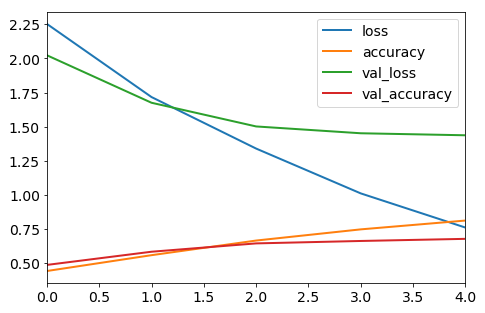

In [30]:
pd.DataFrame(h.history).plot();

In [31]:
h, fixed_model = build_train_eval(reuters_emb_weights)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 108s 13ms/sample - loss: 2.2122 - accuracy: 0.4491 - val_loss: 2.0017 - val_accuracy: 0.4761
Epoch 2/5
8083/8083 [==============================] - 107s 13ms/sample - loss: 1.8587 - accuracy: 0.5168 - val_loss: 1.7530 - val_accuracy: 0.5706
Epoch 3/5
8083/8083 [==============================] - 106s 13ms/sample - loss: 1.7505 - accuracy: 0.5472 - val_loss: 1.7353 - val_accuracy: 0.5517
Epoch 4/5
8083/8083 [==============================] - 107s 13ms/sample - loss: 1.6165 - accuracy: 0.5889 - val_loss: 1.5869 - val_accuracy: 0.6207
Epoch 5/5
8982/8982 [==============================] - 16s 2ms/sample - loss: 1.3545 - accuracy: 0.6634
Train loss: 1.354545992377924
Train accuracy: 0.66343796
2246/2246 [==============================] - 4s 2ms/sample - loss: 1.4376 - accuracy: 0.6389
Test loss: 1.4376042904008848
Test accuracy: 0.63891363


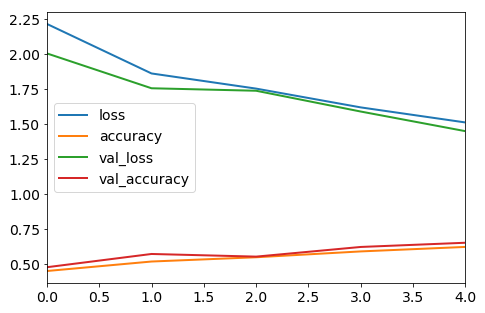

In [32]:
pd.DataFrame(h.history).plot();